<a href="https://colab.research.google.com/github/konradish/MachineLearning/blob/main/Image_Enhancing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN TF Keras
# Keeping it simple

In [1]:
import tensorflow as tf
from keras.layers import Input, add, Concatenate, Conv2D, Conv2DTranspose, Activation, MaxPooling2D, Dropout, UpSampling2D, BatchNormalization, AveragePooling2D
from keras.models import Sequential

img_w=300
img_h=300
img_shape=(img_h,img_w,3)
down_img_shape=(img_h//10,img_w//10,3)
img_w_h = (img_w, img_h)


In [2]:
import glob, random, cv2, numpy as np
from PIL import Image, ImageEnhance, ImageFilter
from io import BytesIO

def degrade(img):
    img_down = cv2.resize(img, img_w_h)
    img_down_pil = Image.fromarray(img_down)


    img_down_pil = ImageEnhance.Color(img_down_pil).enhance(0.0)
    img_down_pil = ImageEnhance.Contrast(img_down_pil).enhance(0.5)
    img_down_pil = ImageEnhance.Brightness(img_down_pil).enhance(0.8)
    
    out = BytesIO()
    img_down_pil.save(out, format="JPEG",quality=5)
    out.seek(0)
    img_down_pil = Image.open(out)
    
    train_X = np.array(img_down_pil) / 255.
    noise_factor=0.0
    train_X_noisy = train_X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_X.shape)  
    train_X_noisy = np.clip(train_X_noisy, 0., 1.)
    return train_X_noisy

def get_random_images(folder_name, batch_size):
    X = []
    X_down = []
    jpgs=glob.glob("%s/*.jpg" % folder_name) + glob.glob("%s/*.jpeg" % folder_name) +  glob.glob("%s/*.webp" % folder_name) + glob.glob("%s/*.jfif" % folder_name) + glob.glob("%s/*.png" % folder_name)
    random.shuffle(jpgs)
    for jpg in jpgs[:batch_size]:
        img=cv2.imread(jpg)
        img = cv2.resize(img, img_w_h)
        X.append( img / 255. )
        train_X_noisy = degrade(img)
        X_down.append(train_X_noisy)
    return X, X_down

def show_image(image):
    image = np.uint8(image*255.)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    im_pil = Image.fromarray(image)
    display(im_pil)
    
def show_images(images):
    for image in images:
        show_image(image)


In [3]:
from keras.models import Sequential, Model
from keras.layers import InputLayer
def get_model(img_shape):
    return Sequential([
        InputLayer(img_shape),
        Conv2D(8, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),
        Conv2D(16, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),
        Conv2D(32, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),
        Conv2D(64, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),
        Conv2D(128, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),      
        Conv2D(256, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),      
        Conv2D(256, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),              
        Conv2D(128, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),        
        Conv2D(64, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),
        Conv2D(32, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),
        Conv2D(16, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),
        Conv2D(8, (3,3), padding = 'same', activation='relu', use_bias=False ),
        BatchNormalization(),
        Conv2D(3, 3, padding = 'same')
    ])

In [4]:
import datetime
from tensorflow import keras

model = get_model(img_shape)
model.summary()
loss_fn = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer, loss=loss_fn, metrics=['accuracy']
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 8)       216       
                                                                 
 batch_normalization (BatchN  (None, 300, 300, 8)      32        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 16)      1152      
                                                                 
 batch_normalization_1 (Batc  (None, 300, 300, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 300, 300, 32)      4608      
                                                                 
 batch_normalization_2 (Batc  (None, 300, 300, 32)     1

In [5]:
def predict(img):
    reco = model.predict(np.array([img]))[0]
    reco = np.uint8(reco*255.)
    reco = cv2.cvtColor(reco, cv2.COLOR_BGR2RGB)
    reco = Image.fromarray(reco)
    return reco

def display_reco():
    s_img=cv2.imread('/root/keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')
    img_down = cv2.resize(s_img, img_w_h)
    train_X_noisy = degrade(img_down)
    display(predict(train_X_noisy))

In [6]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [7]:
!mv /root/.keras /root/keras

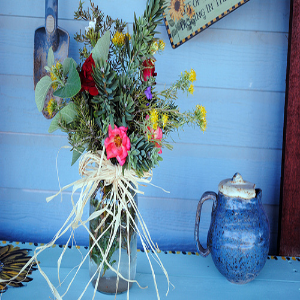

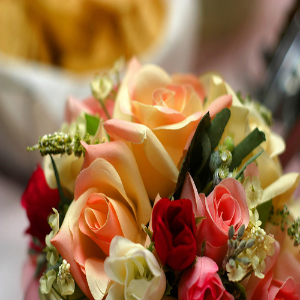

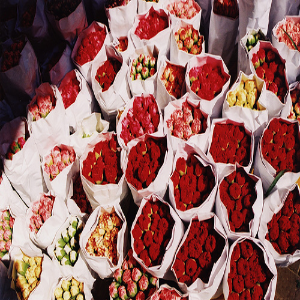

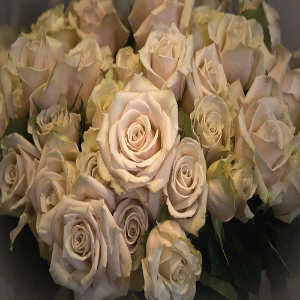

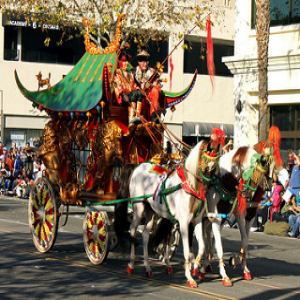

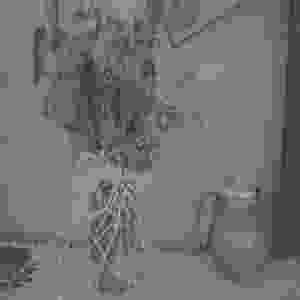

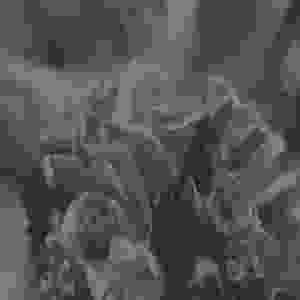

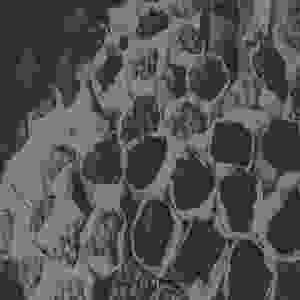

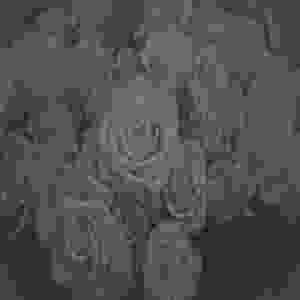

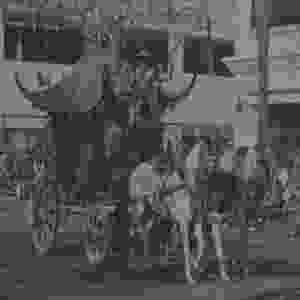

In [8]:
data_dir='/root/keras/datasets/flower_photos/roses'
ups, downs = get_random_images(data_dir, 5)
show_images(ups[:5]+downs[:5])

# New Section

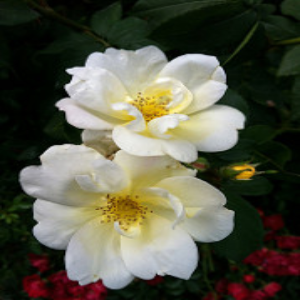

Epoch 1/15
 4/20 [=====>........................] - ETA: 8:20 - loss: 1.4077 - accuracy: 0.3414

In [ ]:
epochs = 15

s_img = Image.open('/root/keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')
s_img = np.array(s_img)
s_img = cv2.resize(s_img, img_w_h)
display(Image.fromarray(s_img))
s_img = np.array(s_img)/255.

for _ in range(10000):
    ups, downs = get_random_images('/root/keras/datasets/flower_photos/roses/', 50)
    
    ups, downs = np.array(ups), np.array(downs)
    model.fit(
        x=downs, y=ups, epochs=epochs, verbose=1, batch_size=2, validation_split=.2
    )

    reco = model.predict(np.array([s_img]))[0]
    reco = np.uint8(reco*255.)
    reco = cv2.cvtColor(reco, cv2.COLOR_BGR2RGB)
    reco = Image.fromarray(reco)

    display(reco)
    display_reco()